<a href="https://colab.research.google.com/github/ginalfaaliza/DQLab_Python-for-Data-Science/blob/main/Case_Study_Promos_for_our_e_commerce_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Exploration

In [29]:
#import library
import pandas as pd

# read data 'ecommerce_banner_promo.csv'
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/ecommerce_banner_promo.csv')

#1. Data Explaratory with head(), info(), describe(), shape
print("\n[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)


[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

         Timestamp  Cli

In [30]:
#2.check correlation value for each feature use .corr()
print("\n[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
print(data.select_dtypes(include=['float','int']).corr())


[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.

In [31]:
#3.check data distribution with .groupby() based on 'Clicked on Ad' and .size()
print("\n[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
print(data.groupby('Clicked on Ad').size())



[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
Clicked on Ad
0    500
1    500
dtype: int64


# Data Eksploration using visual

In [32]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Seting: matplotlib and seaborn
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

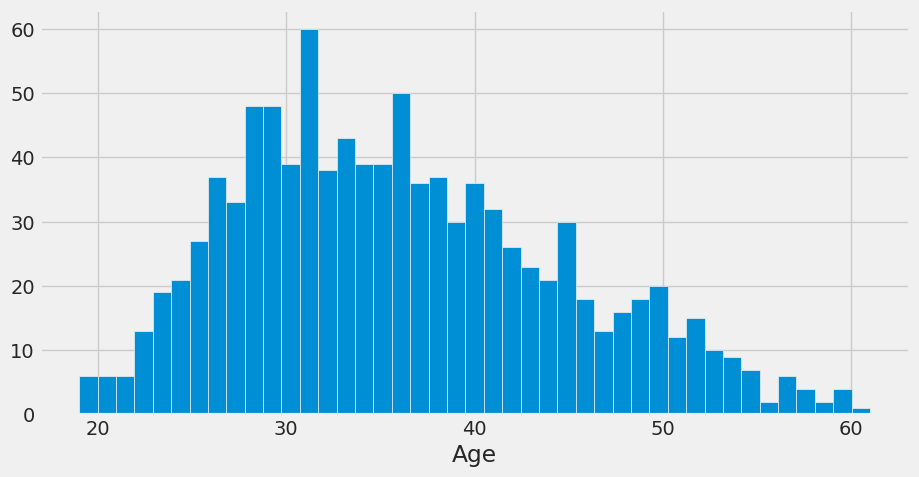

In [34]:
#4. Data Exploration with visualization
#4a. visualization total user by Age range
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.xlabel('Age')
plt.show()

In [ ]:
#4b. visualize relation for each feature
plt.figure()
sns.pairplot(data)
plt.show()

In [ ]:
#5. check missing value
print('\n total of missing value :')
print(data.isnull().sum().sum())

# Modelling

In [ ]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
print("\n[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers, and also drop Target/label, assign Target Variable to y.
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

In [ ]:
#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

In [ ]:
#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))

# Evaluation of Performance

In [ ]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#7. Print Confusion matrix dan classification report
print("\n[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test,y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test,y_pred)
print(cr)